### Описание данных
    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [65]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option("precision", 3)

sns.__version__

'0.11.0'

In [66]:
# !pip install seaborn>=0.11 -U

# !pip3 install --upgrade --user seaborn
# !pip3 install --upgrade --user pandas

In [67]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C:/Users/Mikhail/оформление/Сборный Проект - 1/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [68]:
def data_info(data):
    return data.info(), data.describe()

In [69]:
def data_missing(data):
        for col in data.columns:
            pct_missing = np.mean(data[col].isnull())
            print('{} - {}%'.format(col, round(pct_missing*100)))

In [70]:
data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


(None,
        Year_of_Release   NA_sales   EU_sales   JP_sales  Other_sales  \
 count        16446.000  16715.000  16715.000  16715.000    16715.000   
 mean          2006.485      0.263      0.145      0.078        0.047   
 std              5.877      0.814      0.503      0.309        0.187   
 min           1980.000      0.000      0.000      0.000        0.000   
 25%           2003.000      0.000      0.000      0.000        0.000   
 50%           2007.000      0.080      0.020      0.000        0.010   
 75%           2010.000      0.240      0.110      0.040        0.030   
 max           2016.000     41.360     28.960     10.220       10.570   
 
        Critic_Score  
 count      8137.000  
 mean         68.968  
 std          13.938  
 min          13.000  
 25%          60.000  
 50%          71.000  
 75%          79.000  
 max          98.000  )

1. Есть огромный разброс в данных в продажах по регионам, стоит посмотреть распределение с ограничением по продажам.
2. Юзер скор и рейтинг - тип объект, а не float(оценка не целочисленная)
3. Столбцы с заглавных

In [71]:
data_missing(data)

Name - 0%
Platform - 0%
Year_of_Release - 2%
Genre - 0%
NA_sales - 0%
EU_sales - 0%
JP_sales - 0%
Other_sales - 0%
Critic_Score - 51%
User_Score - 40%
Rating - 40%


1. Год релиза нельзя заменить привычными методами (средним/медианой), либо необходимо искать год релиза либо отбросить.
2. 51%, 41% и 40% критикскор, юзерскора и рейтинга отсутсвует скорее всего с тем, что полноценная система оценок сформировалась не так давно и долгое время игры не оценивались игровыми журналистами, а сайтов агрегаторов отзывов появились тоже позже.

In [72]:
list_data = data[['Platform', 'Genre', 'Critic_Score', 'User_Score', 'Rating']]

In [73]:
for col in list_data.columns:
    list = list_data[col].value_counts(dropna=False)
    print('{} - {}%'.format(col, list))

Platform - PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64%
Genre - Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
NaN                2
Name: Genre, dtype: int64%
Critic_Score - NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
73.0     238
80.0     237
76.0     235
72.0     226
74.0     226
77.0     225
68.0     219
79.0     218
81.0     218
69.0     215
82.0     208
83.0     206
66.0     203

1. Есть пропуски в жанрах - 2, можно выкинуть, при условии что это не топы продаж
2. В юзер_скор есть строчки NaN и tbd - To Be Determined (будет определено). Следует проверить, есть ли взаимосвязь между эти обозначением и старыми играми (старые игры мало оценивали)

In [74]:
x_list = ['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']

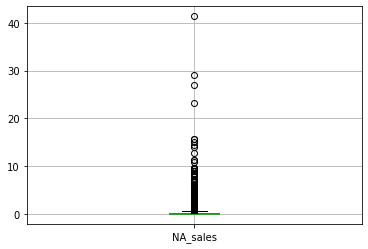

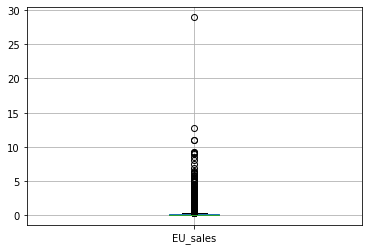

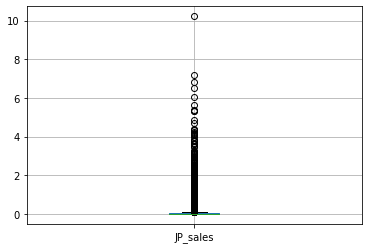

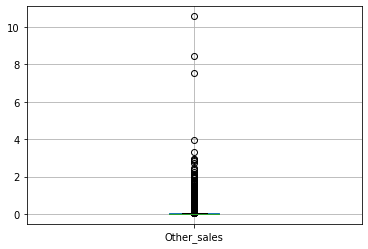

In [75]:
for col in x_list:
    data.boxplot(col)
    plt.show()

1. Из за игр со сверхвысокими продажами тяжело увидеть как распределены большинство остальных игр, сделаем лимит с до 1млн продаж

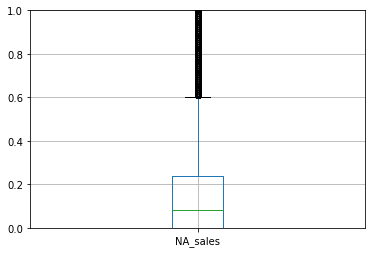

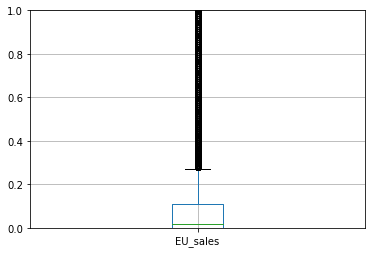

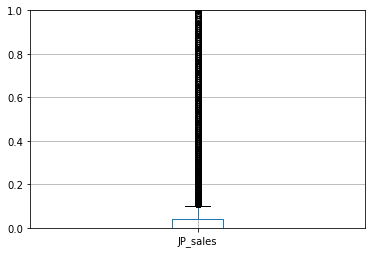

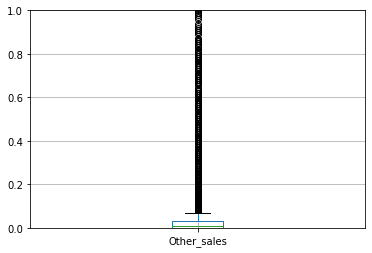

In [76]:
for col in x_list:
    plt.ylim(0, 1)
    data.boxplot(col)
    plt.show()

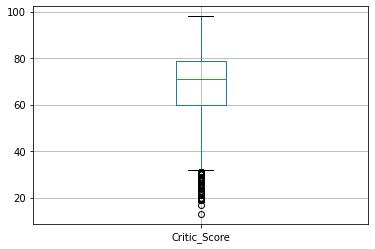

In [77]:
data.boxplot('Critic_Score')
plt.show()

1. Судя по таблице игры продаются там тол или ином рынке - они могут иметь нулевые продажи в остальных регионах, но иметь в одном продажи, таким образом можно объяснить наличие большого числе нулей по разным регионам

# Шаг 2. Подготовьте данные

1. Замените названия столбцов (приведите к нижнему регистру);
2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
3. Обработайте пропуски при необходимости:

        Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
        Опишите причины, которые могли привести к пропускам;
        Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [78]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [79]:
#data['year_of_release'] = data['year_of_release'].astype('Int64')

1. Перевод в тип даты создает день и месяц и делает формат 2000.01.01, что не является точно дайтой релиза, проще будет аперировать с int типом, например для построения графиков
        1.1 В дальнейшем при определении актуального периода не сортировало по Int64, поэтому изменение типа будет проведено там

In [80]:
data['user_score'] = data['user_score'].apply(pd.to_numeric, errors='coerce')

1. Столбец содержит NaN и приведение к целочисленному типу через Int64 не подойдет, оценка не целчислена, такой метод изменит тип столбца и сохранит значения

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [82]:
pd.options.mode.chained_assignment = None

critic_data = data.query('critic_score != critic_score')
critic_data['critic_score'] = critic_data['critic_score'].fillna(1)
user_data = data.query('user_score != user_score')
user_data['user_score'] = critic_data['user_score'].fillna(1)
rating_data = data.query('rating != rating')
rating_data['rating'] = critic_data['rating'].fillna(1)

In [83]:
critic_group = critic_data.groupby(['year_of_release', 'critic_score'], as_index=False)['critic_score'].count()
rating_group = rating_data.groupby(['year_of_release', 'rating'], as_index=False)['rating'].count()
user_group = user_data.groupby(['year_of_release', 'user_score'], as_index=False)['user_score'].count()

In [84]:
data_games_count = data.groupby('year_of_release', as_index=False)['platform'].count()
data_games_count.columns = ['year_of_release', 'game_count']
#data_games_count

In [85]:
test_group = rating_group.merge(user_group, on='year_of_release', how='outer')
test_group = test_group.merge(critic_group, on='year_of_release', how='outer')
test_group = test_group.merge(data_games_count, on='year_of_release', how='outer')

In [86]:
test_group['rating_ratio'] = test_group['rating'] / test_group['game_count']
test_group['user_ratio'] = test_group['user_score'] / test_group['game_count']
test_group['critic_ratio'] = test_group['critic_score'] / test_group['game_count']
test_group.head(5)

,year_of_release,rating,user_score,critic_score,game_count,rating_ratio,user_ratio,critic_ratio
0,1980.0,9,9,9,9,1.0,1.0,1.0
1,1981.0,46,46,46,46,1.0,1.0,1.0
2,1982.0,36,36,36,36,1.0,1.0,1.0
3,1983.0,17,17,17,17,1.0,1.0,1.0
4,1984.0,14,14,14,14,1.0,1.0,1.0


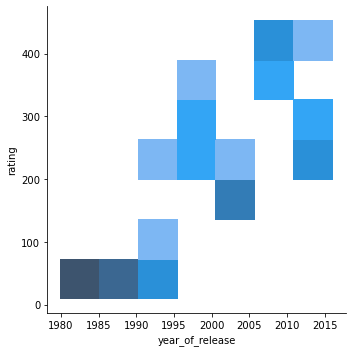

In [87]:
sns.displot(test_group, x='year_of_release', y='rating')
plt.show()

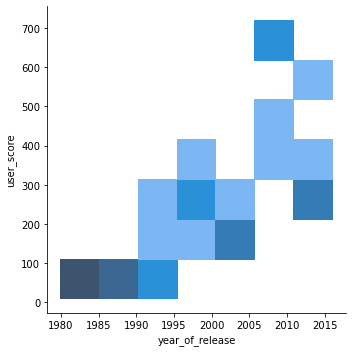

In [88]:
sns.displot(test_group, x='year_of_release', y='user_score')
plt.show()

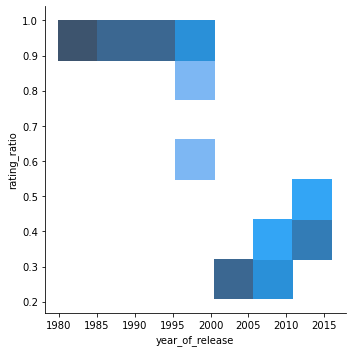

In [89]:
sns.displot(test_group, x='year_of_release', y='rating_ratio')
plt.show()

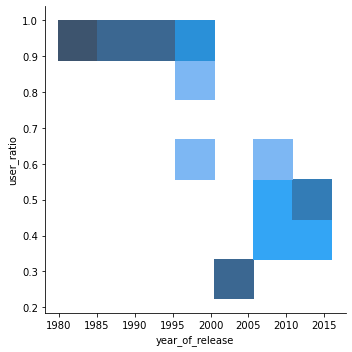

In [90]:
sns.displot(test_group, x='year_of_release', y='user_ratio')
plt.show()

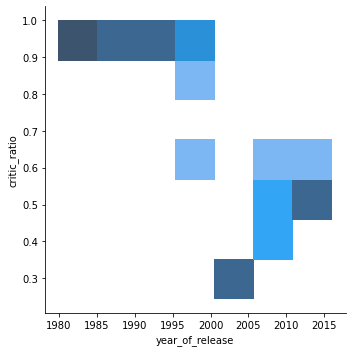

In [91]:
sns.displot(test_group, x='year_of_release', y='critic_ratio')
plt.show()

1. Данные пропуски не подходят под гипотезу о том, что старые игры меньше оценивали, по графикам видно, что с годами с ростом числа игр - росло и число неоцененных игр
3. Если строить графики по соотношению игр с пропущенными и числом всех игр за год, то омжно увидеть как их соотношение резко падает на границе 2000х годов и снова начинает расти. Можно говорить, что наша гипотеза подходит под очень старые игры (год выпуска 2000<), однако непонятны причины роста соотношения после 2005 года.
2. Имеет смысл заменить пропущенные значение на 0 или 1, что бы была возможность их анализа и использования в дальнейшем, а чтобы они не искажали графики, их можно будет строить с учетом этого условия.

In [92]:
data['rating'] = data['rating'].fillna('X')

In [93]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [94]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,X,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,X,31.38


1. Большая часть пропусков невозможна к заполнению средним или медианой, а удаление данных строк приведет к полному искажению данных.
2. В категории рейтинг пропуски можно пометить условным маркером Х, для использования его в дальнейшем при анализе продаж по рейтингам.

# Шаг 3. Проведите исследовательский анализ данных

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
1. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
2. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
3. Не учитывайте в работе данные за предыдущие годы.
4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
7. Соотнесите выводы с продажами игр на других платформах.
8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [95]:
#data_games_count

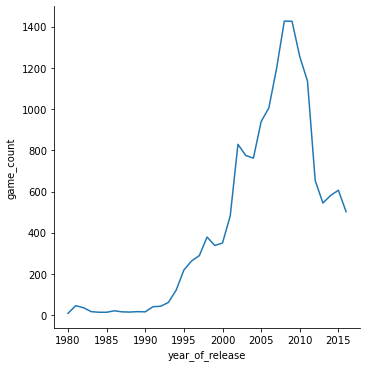

In [96]:
sns.relplot(x="year_of_release", y="game_count", kind="line", data=data_games_count)
plt.show()

1. Из графика виден резкий спад количества игр с 2010 года и этот тренд сохранился вплоть до 2016г.
2. Из таблицы можно определить актуальный период с 2008-2009 года:
        2.1 Этот период следует сразу после кризиса 2008 года
        2.2 Этот период приходится ровно на спад выходивших видеоигр

In [97]:
top_sales_platform = data.groupby('platform')['total_sales'].sum()
top_sales_platform.sort_values(ascending=False).head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

In [98]:
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC','XOne']
data_top_platform_plot = data.loc[data['platform'].isin(top_platform)]
#data_top_platform_plot

In [99]:
data_vest =  data_top_platform_plot.pivot_table(index='year_of_release', columns='platform',
                            values='total_sales', aggfunc='sum')

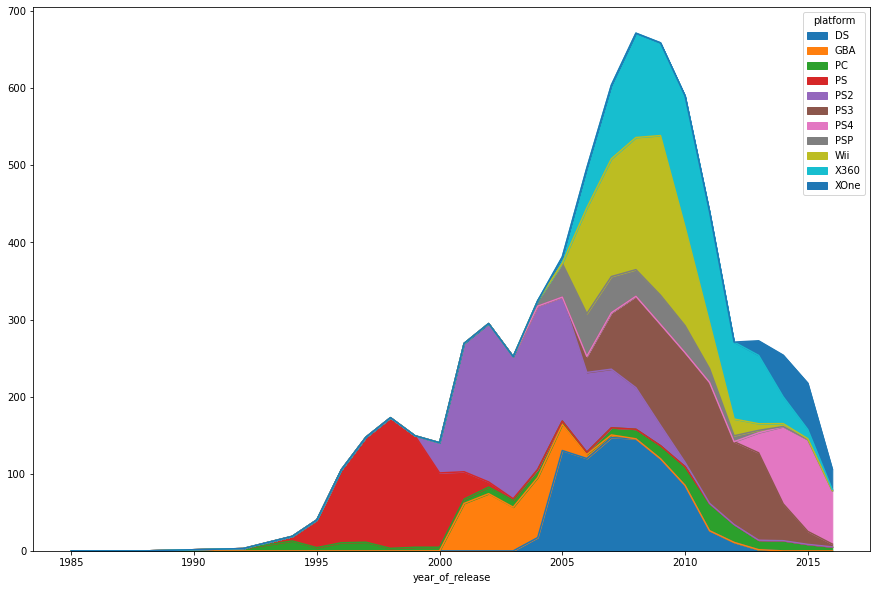

In [100]:
ax = data_vest.plot.area(figsize=(15,10))

In [101]:
data_platform_sales = data_top_platform_plot.groupby(['platform', 'year_of_release'], 
                                                     as_index=False)[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()

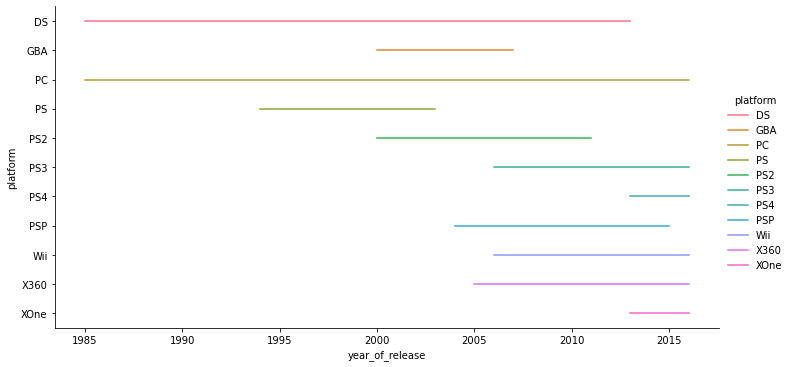

In [102]:
sns.relplot(x="year_of_release", y="platform", hue="platform", kind="line", aspect=2, data=data_platform_sales)
plt.show()

1. По жанному графику хорошо видны жизненые циклы приставоr PS2\PS3\PS4 По разнице между их релизу можно определить актуальный временной промежуток.
2. Так же важно учитывать, что выход новой игровой приставки не знаменует смерть предыдущей, сначало идет спад продаж одной и рост другой.

In [103]:
data.query('platform == "PS"').sort_values('year_of_release')['year_of_release'].head(1)

1567    1994.0
Name: year_of_release, dtype: float64

In [104]:
data.query('platform == "PS2"').sort_values('year_of_release')['year_of_release'].head(1)

11103    2000.0
Name: year_of_release, dtype: float64

In [105]:
data.query('platform == "PS3"').sort_values('year_of_release')['year_of_release'].head(1)

9647    2006.0
Name: year_of_release, dtype: float64

In [106]:
data.query('platform == "PS4"').sort_values('year_of_release')['year_of_release'].head(1)

2271    2013.0
Name: year_of_release, dtype: float64

1. Промежуток между PS1 и PS2 составляет 6 лет, как и между PS2 и PS3 - 6 лет, а между PS3 и PS4 - 7 лет, по данной консоли можно хорошо отслеживать жизненый цикл игровых платформ.
2. В качестве актуального срока возьмем 7 лет, тоесть учитывать будет период с 2009 по 2016 год - такой период будет учитывать:
        2.1 Мы не берем первые три года жизни PS3 но берем первые три года жизни PS4, что даст нам картнуи развития новой платформы.

In [107]:
data = data.query('year_of_release >= 2009').reset_index()
data['year_of_release'] = data['year_of_release'].astype('int64')
data

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
1,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
2,14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
3,15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
4,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698,16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,X,0.01
6699,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,X,0.01
6700,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,X,0.01
6701,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,X,0.01


In [108]:
platform_sales = data.groupby(['platform', 'year_of_release'], as_index=False)[['total_sales']].sum()

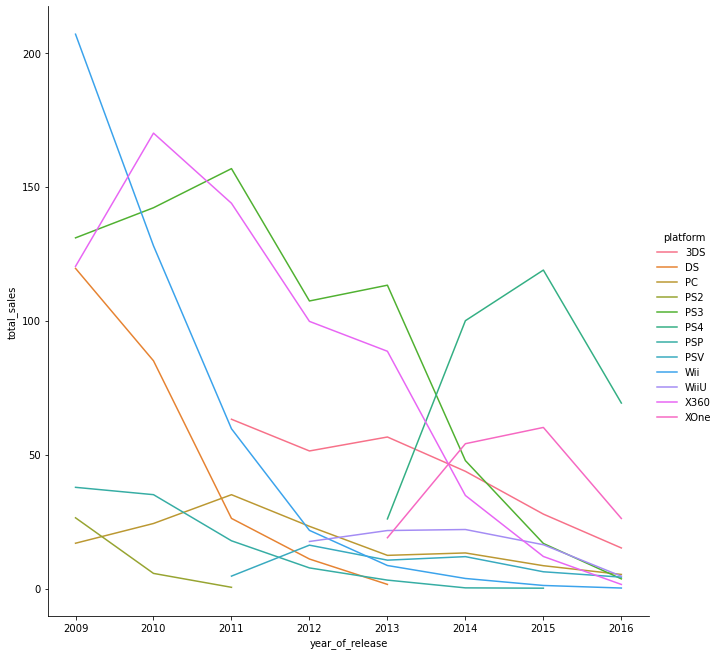

In [109]:
sns.relplot(x="year_of_release", y="total_sales", hue="platform", kind="line", aspect=1., height=9, data=platform_sales)

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
1. Наиболее перспективными платформами можно выделить PS4 и XOne - они в середине своего жизненого цикла, если ориентироваться на средний срок в 7 лет
2. Исходя из аналза всех данных можно говорить о долговечности PC как платформы, но общие продажи не так велики на ней
3. Общий спад числа игр можно связать так же и с распространением мобильного гейминга, по разным оценкам он генерирует до 33% всех прибылей этой отрасли.
https://newzoo.com/insights/articles/global-games-market-reaches-99-6-billion-2016-mobile-generating-37/

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат**

Для нормального построения определим границы продаж как 5млн< продаж - это будет составлять 98% от всех игр, игры хиты не повлияют на график.

In [110]:
data.query('total_sales <= 5')['name'].count() / len(data)

0.9873191108458899

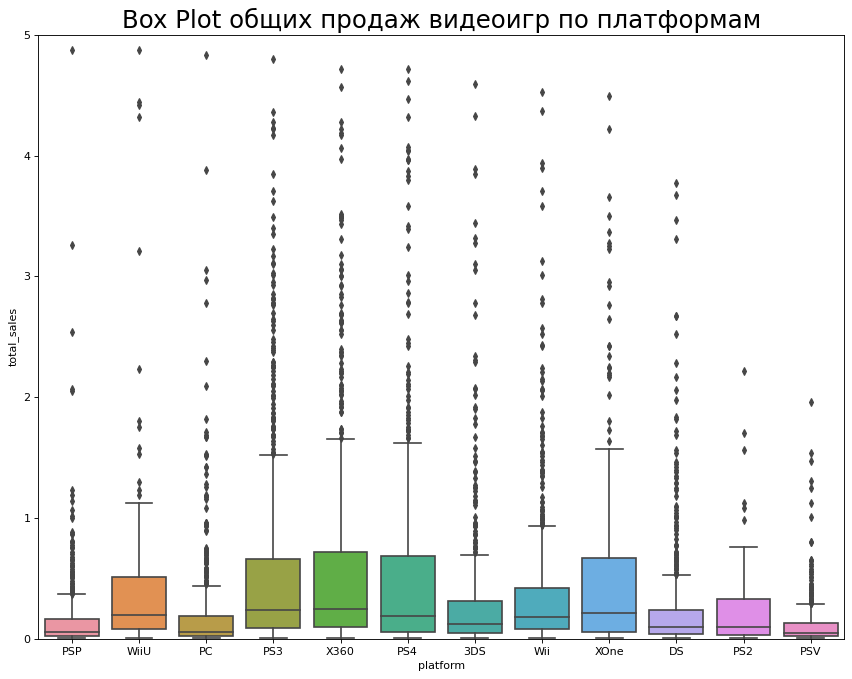

In [111]:

df = data.query('total_sales <= 5')

plt.figure(figsize=(13,10), dpi= 80)
plt.ylim(0, 5)
sns.boxplot(x='platform', y='total_sales', data=df)

for i in range(len(df['platform'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

plt.title('Box Plot общих продаж видеоигр по платформам', fontsize=22)
plt.show()

1. Наибольшие усы у PS3\PS4 и X360\XOne, а так же у WiiU - у этих платформ более широкое распределение, их медианы выше медиан других платформ, значит средние продажи средней игры на данных платформах выше и фокус на этих платформах предпочтительнее

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 
Сформулируйте выводы.**

In [112]:
data

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
1,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
2,14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
3,15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
4,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698,16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,X,0.01
6699,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,X,0.01
6700,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,X,0.01
6701,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,X,0.01


In [113]:
def plot_corr(data, platformer, corr_row, level):
    if level == 1:
        correlation_PS3 = data[data['platform'] == platformer]
        correlation_PS3 = correlation_PS3[corr_row]
        pd.plotting.scatter_matrix(correlation_PS3, figsize=(12, 12))
        plt.show()
    elif level == 2:
        correlation_PS3 = data[data['platform'] == platformer]
        correlation_PS3 = correlation_PS3[corr_row]

        plt.figure(figsize=(12,10), dpi= 80)
        sns.heatmap(correlation_PS3.corr(), xticklabels=correlation_PS3.corr().columns, 
                    yticklabels=correlation_PS3.corr().columns, cmap='RdYlGn', center=0, annot=True)

        plt.title('Корреляция общих продаж от оценок критиков, оценок игроков на {0}'.format(platformer), fontsize=22)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()

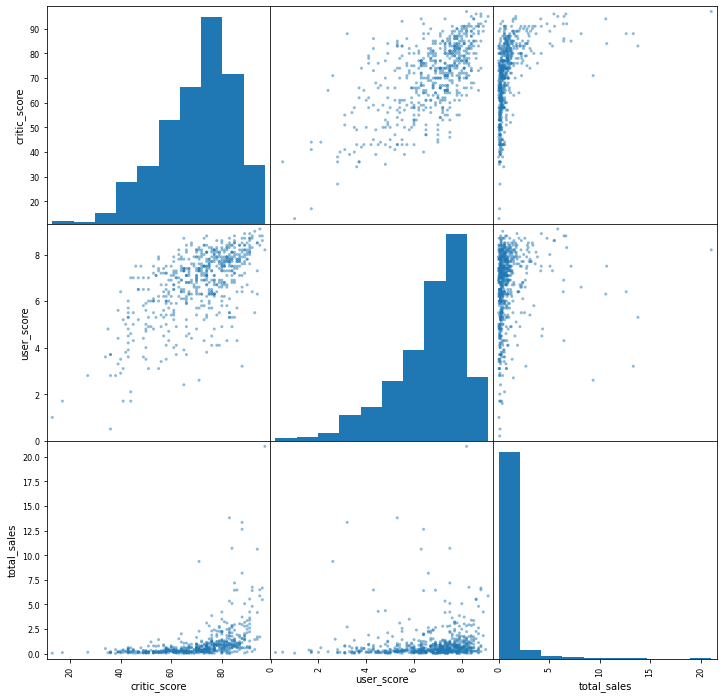

In [114]:
plot_corr(data, "PS3", ['platform', 'critic_score', 'user_score', 'total_sales'], 1)

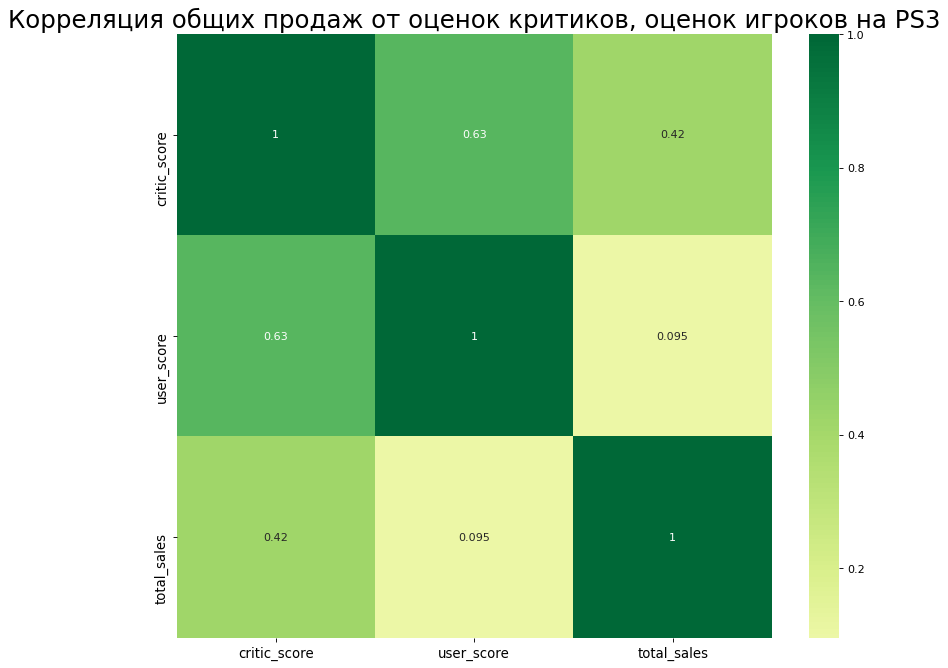

In [115]:
plot_corr(data, "PS3", ['platform', 'critic_score', 'user_score', 'total_sales'], 2)

1. Можно говорить о наличии определенной взаимосвязи с оценкой критиков и общими продажами, возможно отзывы крупных игровых изданий стимулирует интерес к играм, обзоры которых они пишут.
2. Однако нельзя говорить о наличии взаимосвязи между продажами и оценкой игроков, но они в свою очередь коррелируют с оценками критиков

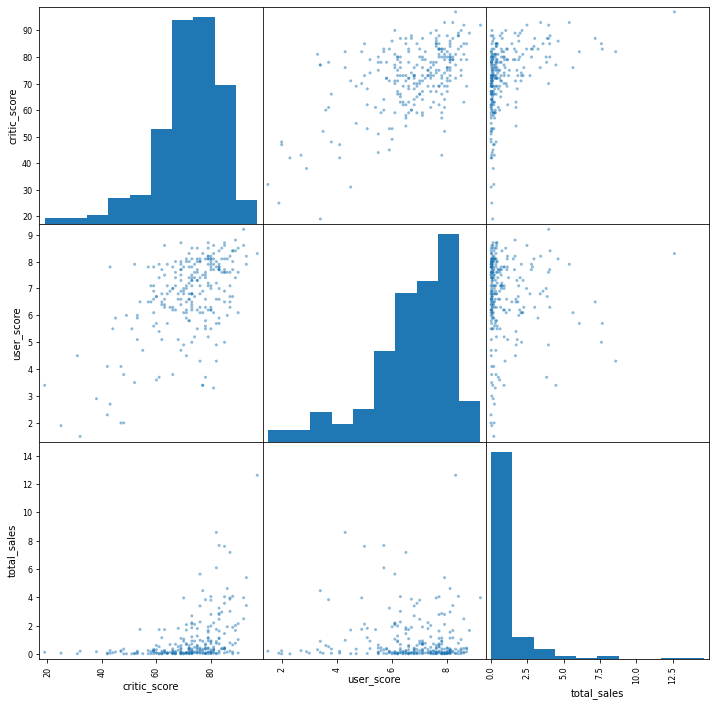

In [116]:
plot_corr(data, "PS4", ['platform', 'critic_score', 'user_score', 'total_sales'], 1)

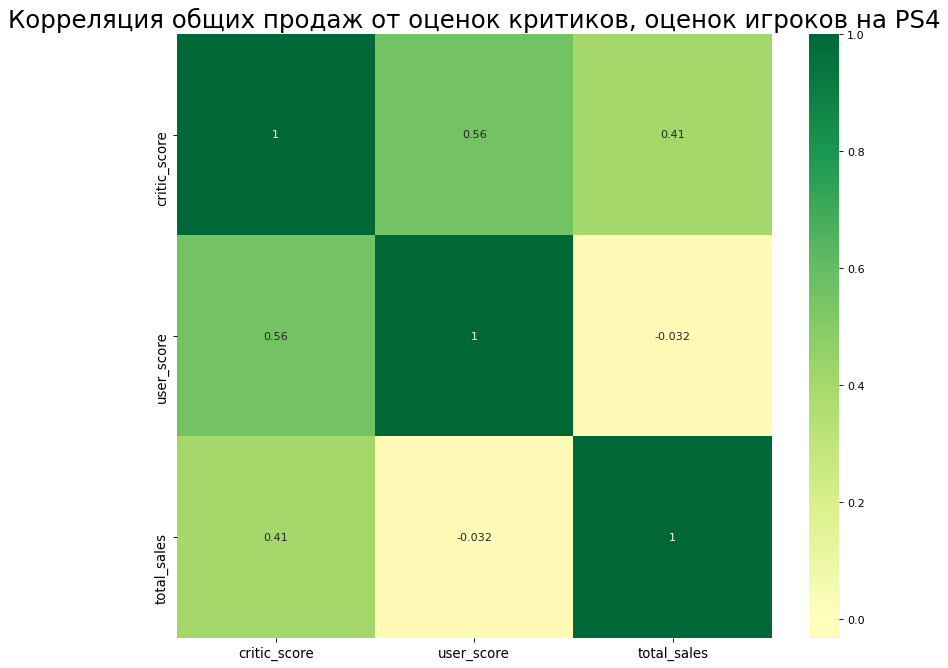

In [117]:
plot_corr(data, "PS4", ['platform', 'critic_score', 'user_score', 'total_sales'], 2)

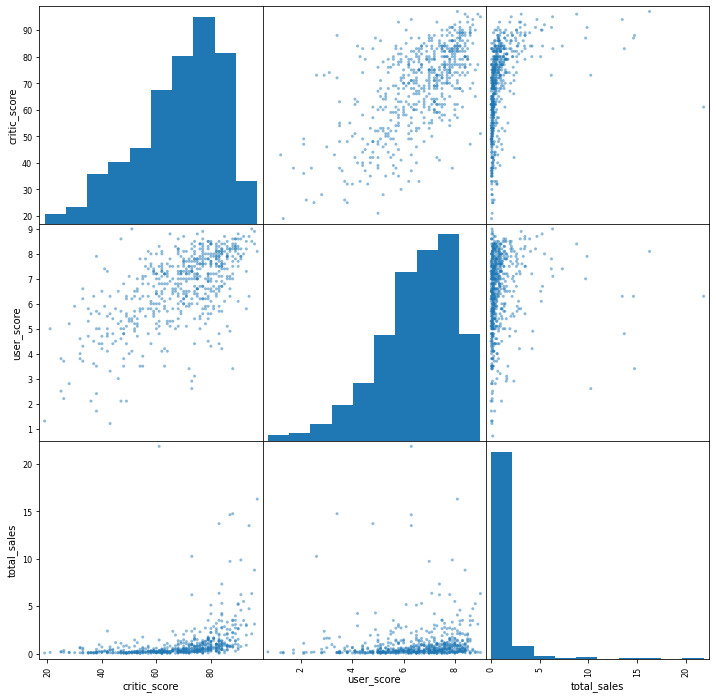

In [118]:
plot_corr(data, "X360", ['platform', 'critic_score', 'user_score', 'total_sales'], 1)

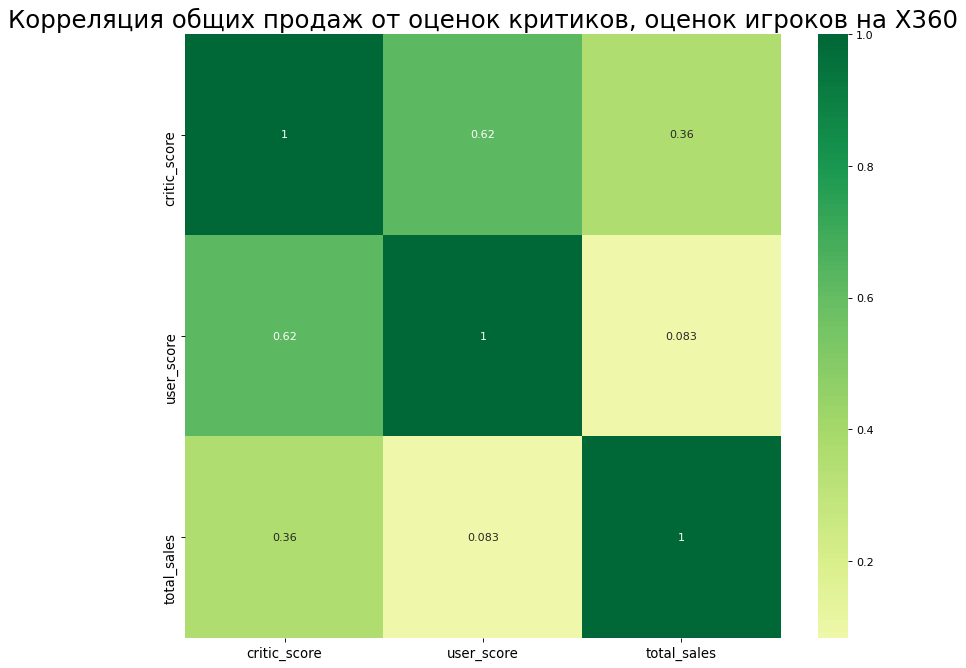

In [119]:
plot_corr(data, "X360", ['platform', 'critic_score', 'user_score', 'total_sales'], 2)

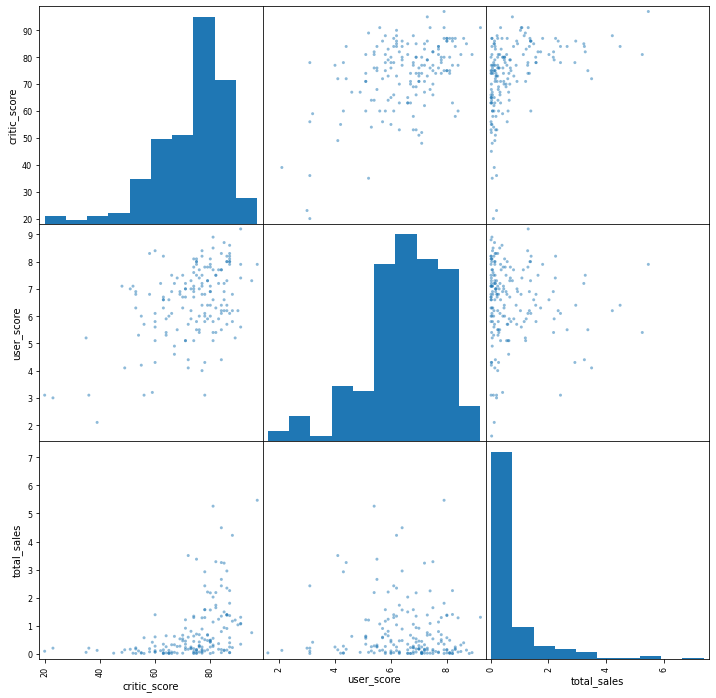

In [120]:
plot_corr(data, "XOne", ['platform', 'critic_score', 'user_score', 'total_sales'], 1)

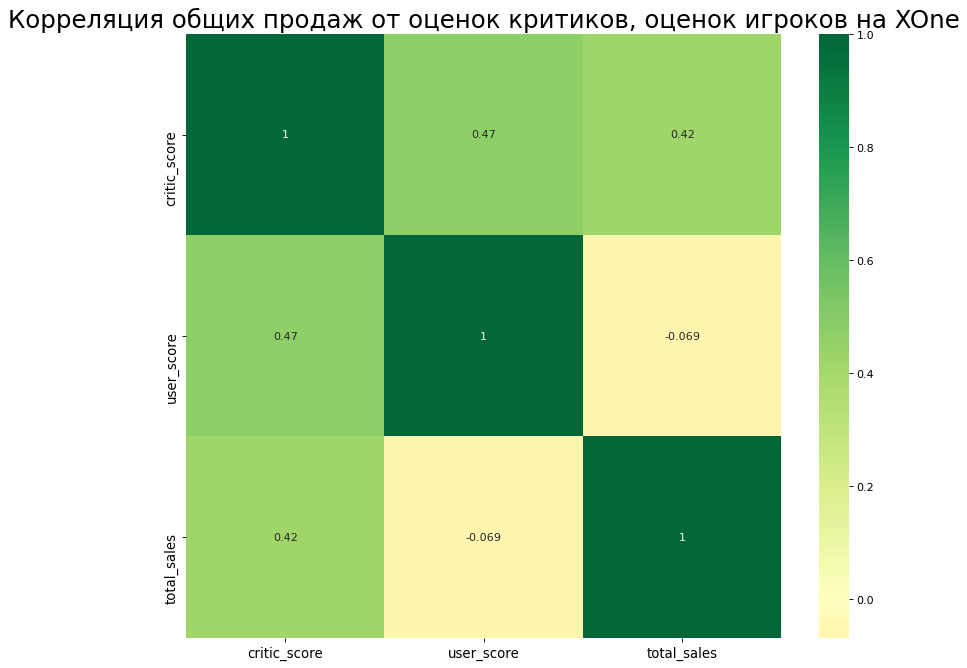

In [121]:
plot_corr(data, "XOne", ['platform', 'critic_score', 'user_score', 'total_sales'], 2)

1. Похожие выводы можно отнести и к другим платформам.

In [122]:
data_genre = data.pivot_table(index='year_of_release', columns='genre',
                            values='total_sales', aggfunc='sum')
#data_genre

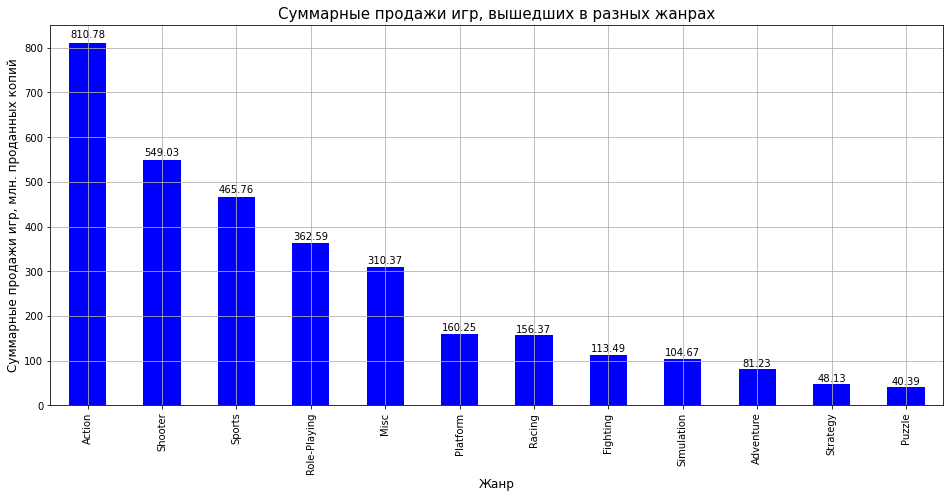

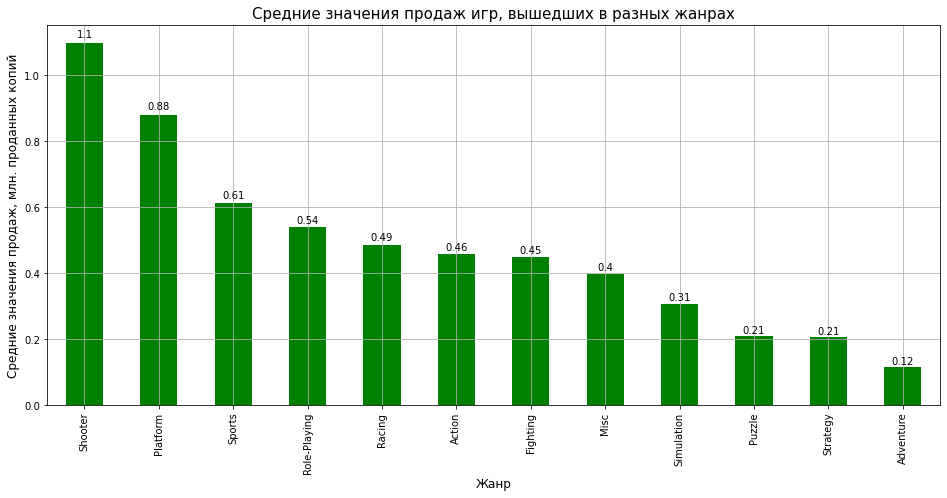

In [123]:
def standart_plot_bar_graph(data, h_column, v_column, title, xlabel, ylabel, color = 'blue'):
    
    plot = data.plot(kind='bar', x=h_column, y=v_column, legend=False, figsize=(16,7), grid=True, color=color)
    
    for rect in plot.patches:
        height = rect.get_height()
        plot.text(rect.get_x() + rect.get_width()/2, 1.01*height, round(height, 2), ha='center', va='bottom')
    
    plot.set_title(title, fontsize = 15)
    plot.set_xlabel(xlabel, fontsize = 12)
    plot.set_ylabel(ylabel, fontsize = 12)
    plt.show()

pivot_genres = data.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index()
pivot_genres = pivot_genres.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

standart_plot_bar_graph(
    pivot_genres,
    'genre',
    'total_sales',
    'Суммарные продажи игр, вышедших в разных жанрах', 
    'Жанр', 
    'Суммарные продажи игр, млн. проданных копий')

pivot_genres_mean = data.pivot_table(index='genre', values='total_sales', aggfunc='mean').reset_index()
pivot_genres_mean = pivot_genres_mean.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

standart_plot_bar_graph(
    pivot_genres_mean,
    'genre',
    'total_sales',
    'Средние значения продаж игр, вышедших в разных жанрах', 
    'Жанр', 
    'Средние значения продаж, млн. проданных копий',
    color = 'green'
)

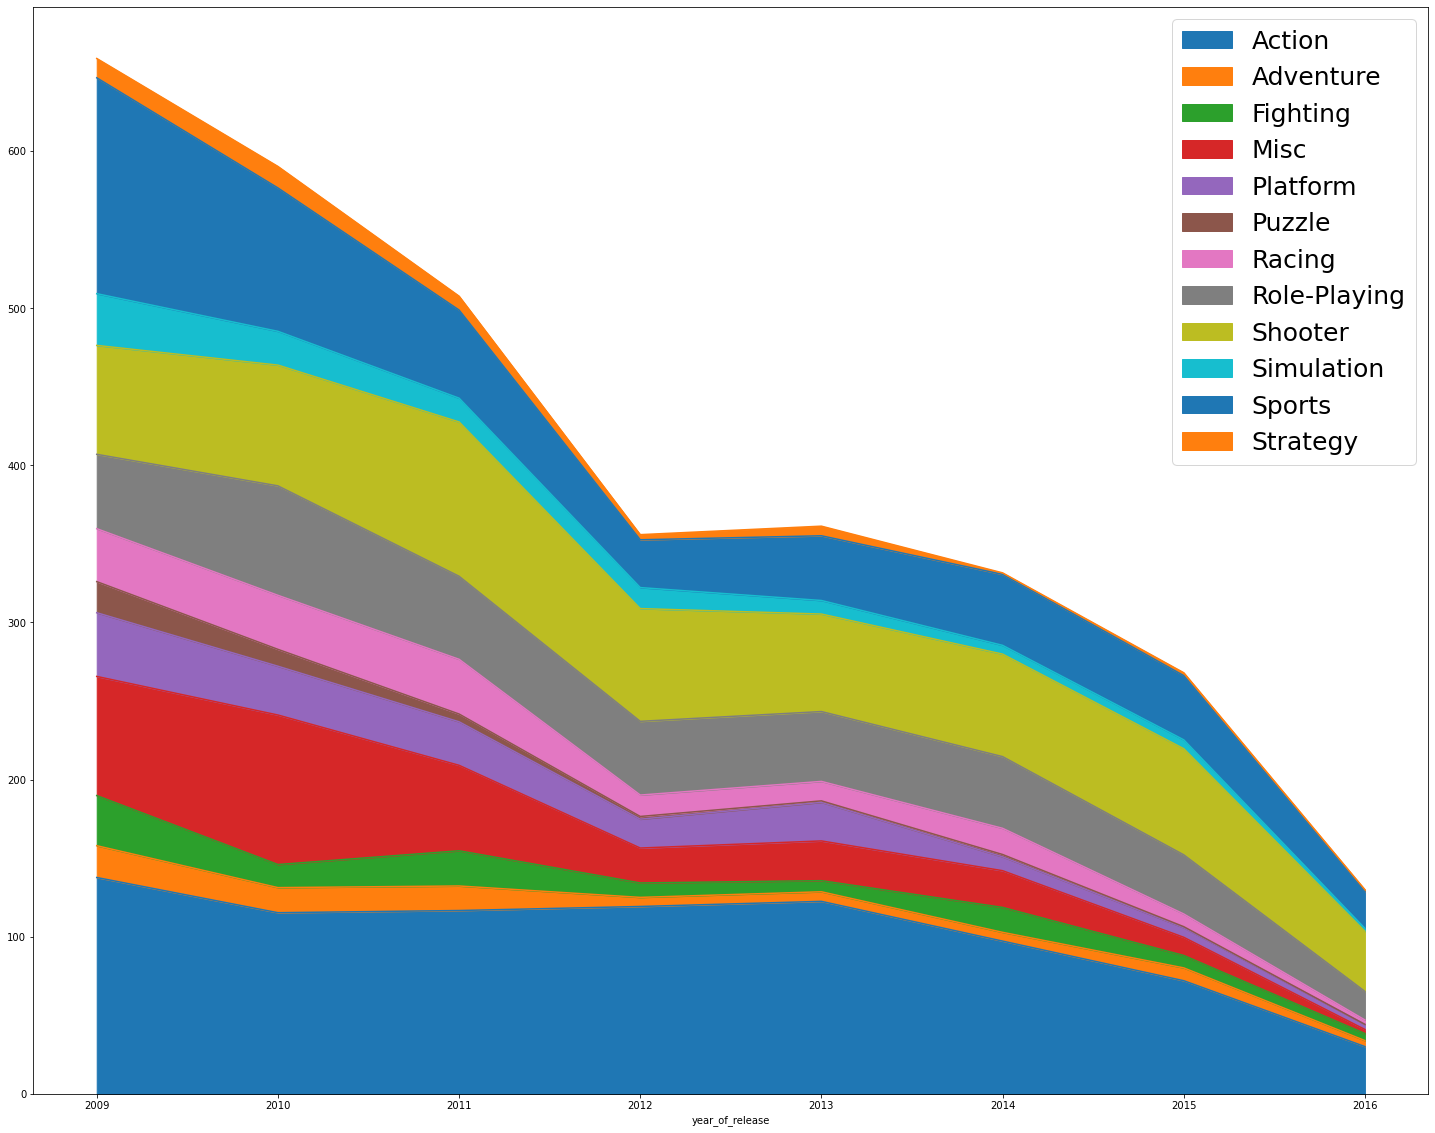

In [124]:
ax = data_genre.plot.area(figsize=(25,20))
ax.legend(loc=1, prop={'size': 25})
plt.show()

1. Наиболее прибыльным жанром является action\misc(разные)\shooter\rpg
2. Несмотря на общий спал продаж action\shooter\rpg игры держатся на наибольшем уровне

# Шаг 4. Составьте портрет пользователя каждого региона

1. Определите для пользователя каждого региона (NA, EU, JP):
        Самые популярные платформы (топ-5). Опишите различия в долях продаж.
        Самые популярные жанры (топ-5). Поясните разницу.
        Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [125]:
data_jp_top_platform = data.groupby('platform', as_index=False)['jp_sales'].sum()
data_jp_top_platform = data_jp_top_platform.sort_values('jp_sales', ascending=False).head()
data_jp_top_platform

,platform,jp_sales
0,3DS,100.62
4,PS3,68.29
1,DS,52.11
6,PSP,50.39
8,Wii,34.32


In [126]:
data_na_top_platform=data.groupby('platform', as_index=False)['na_sales'].sum()
data_na_top_platform = data_na_top_platform.sort_values('na_sales', ascending=False).head()
data_na_top_platform

,platform,na_sales
10,X360,408.18
4,PS3,291.90
8,Wii,235.75
1,DS,120.61
5,PS4,108.74


In [127]:
data_eu_top_platform = data.groupby('platform', as_index=False)['eu_sales'].sum()
data_eu_top_platform = data_eu_top_platform.sort_values('eu_sales', ascending=False).head()
data_eu_top_platform

,platform,eu_sales
4,PS3,255.00
10,X360,196.72
5,PS4,141.09
8,Wii,124.22
2,PC,82.32


In [128]:
data_jp_top_genre = data.groupby(['genre'], as_index=False)['jp_sales'].sum()
data_jp_top_genre = data_jp_top_genre.sort_values('jp_sales', ascending=False).head()
data_jp_top_genre

,genre,jp_sales
7,Role-Playing,120.61
0,Action,84.16
3,Misc,30.09
10,Sports,25.32
4,Platform,20.65


In [129]:
data_na_top_genre = data.groupby(['genre'], as_index=False)['na_sales'].sum()
data_na_top_genre = data_na_top_genre.sort_values('na_sales', ascending=False).head()
data_na_top_genre

,genre,na_sales
0,Action,361.72
8,Shooter,276.37
10,Sports,227.66
3,Misc,164.40
7,Role-Playing,130.83


In [130]:
data_eu_top_genre = data.groupby(['genre'], as_index=False)['eu_sales'].sum()
data_eu_top_genre = data_eu_top_genre.sort_values('eu_sales', ascending=False).head()
data_eu_top_genre

,genre,eu_sales
0,Action,271.91
8,Shooter,192.30
10,Sports,158.51
3,Misc,86.27
7,Role-Playing,83.56


In [153]:
def plot_sales_reign(data, x_lable, y_lable, title):
    df = data.head(5)
    fig, ax = plt.subplots(figsize=(12, 15), subplot_kw=dict(aspect="equal"), dpi= 80)

    dat = data[x_lable]
    categories = df[y_lable]

    def func(pct, allvals):
            absolute = int(pct/100.*np.sum(allvals))
            return "{:.1f}% ({:d} )".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(dat, 
                                      autopct=lambda pct: func(pct, dat),
                                      textprops=dict(color="w"), 
                                      colors=plt.cm.Dark2.colors,
                                     startangle=140)

    ax.legend(wedges, categories, title="Платформы", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=12, weight=700)
    ax.set_title("Топ-5 Колличество продаж по {0}".format(title))
    plt.show()

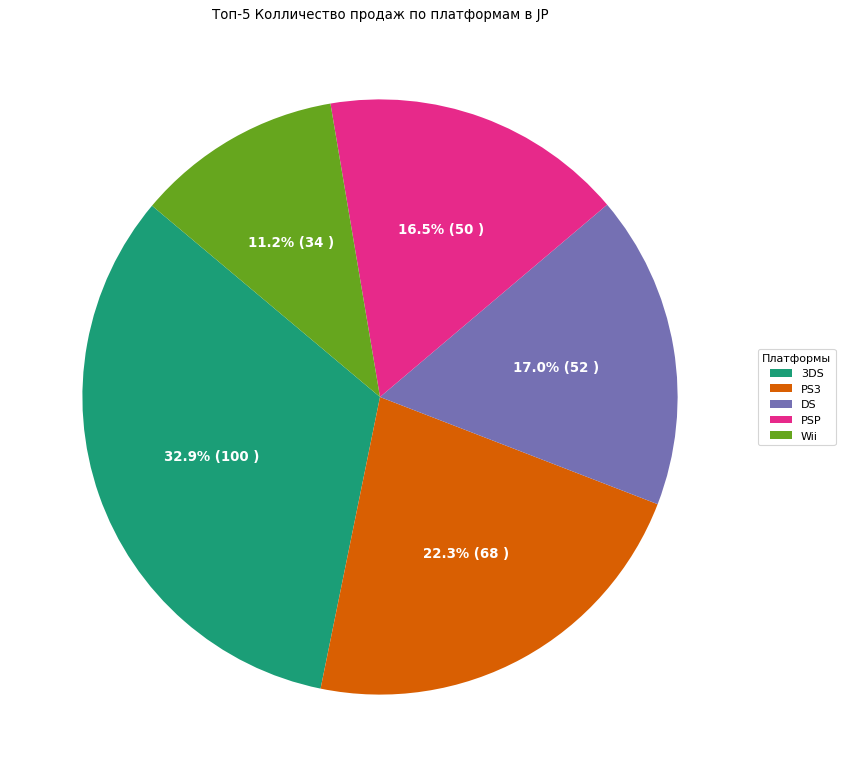

In [155]:
plot_sales_reign(data_jp_top_platform, 'jp_sales', 'platform', "платформам в JP")

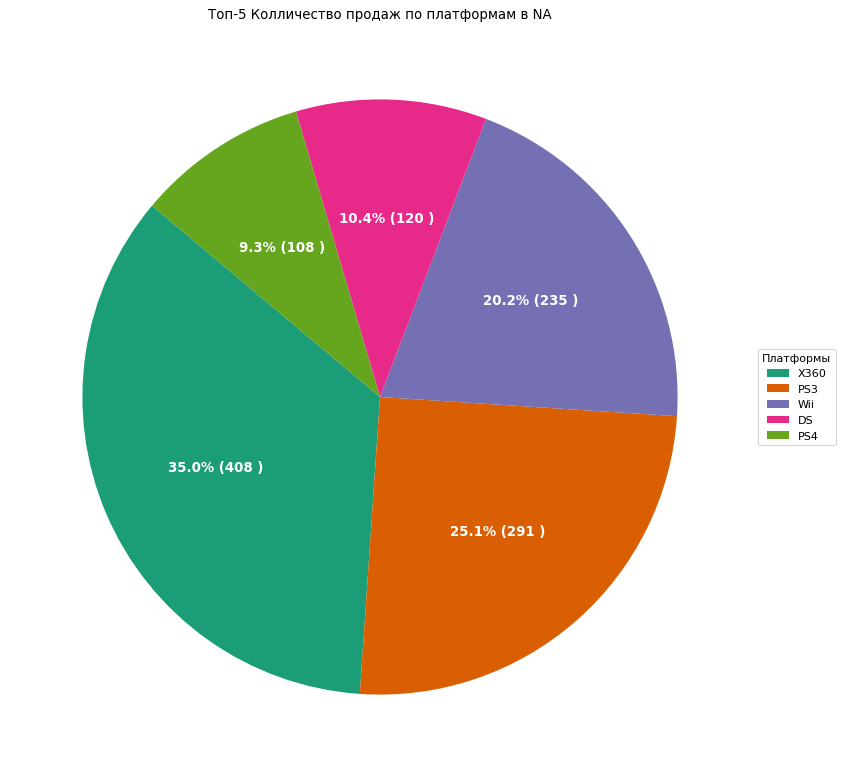

In [156]:
plot_sales_reign(data_na_top_platform, 'na_sales', 'platform', "платформам в NA")

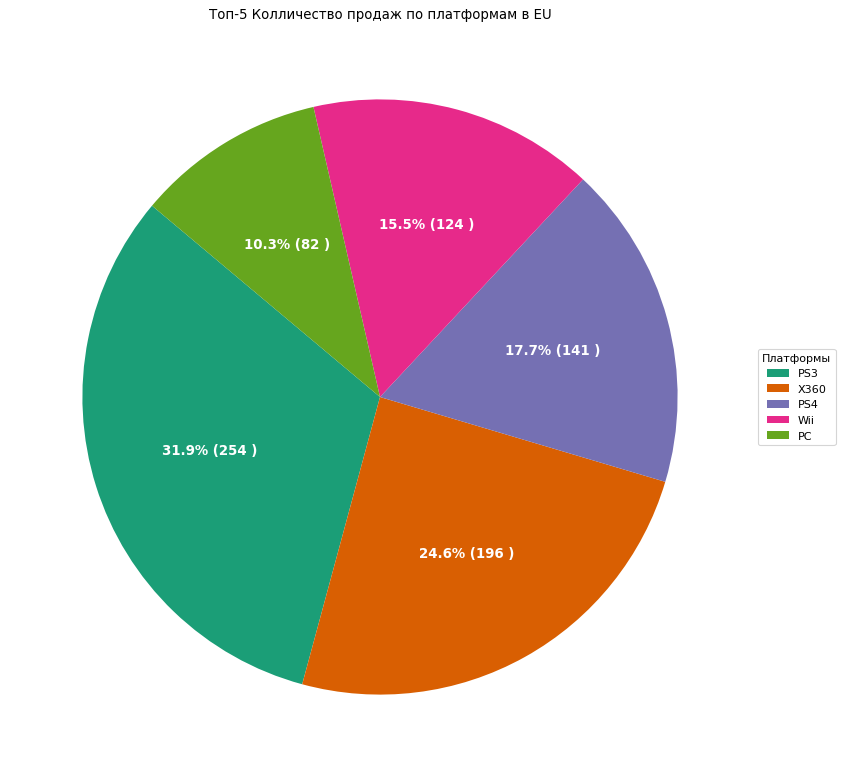

In [157]:
plot_sales_reign(data_eu_top_platform, 'eu_sales', 'platform', "платформам в EU")

1. В топе NA и EU регионов стоят одиноквые консоли, однако в NA преобладает консоль от Microsoft, для которой этот рынок является домашним.
2. Единственная отличная платформа в NA и EU - DS\PC
3. Рынок JP полностью отличается от остальных, там лидирует 3DS и общие продажи этой платформы зависят от этого региона.


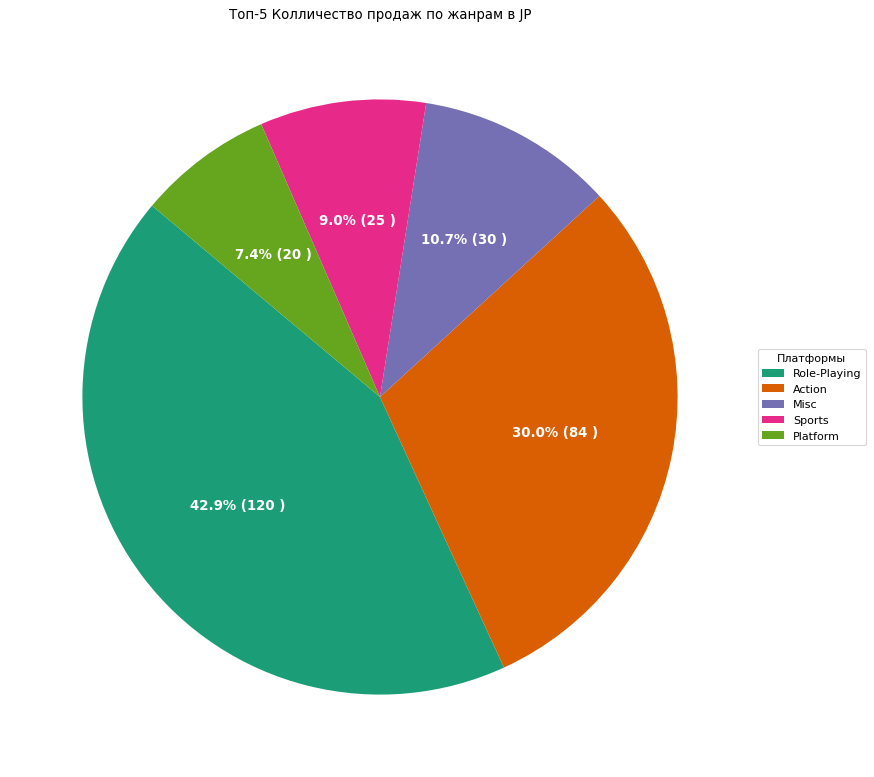

In [161]:
plot_sales_reign(data_jp_top_genre, 'jp_sales', 'genre', "жанрам в JP")

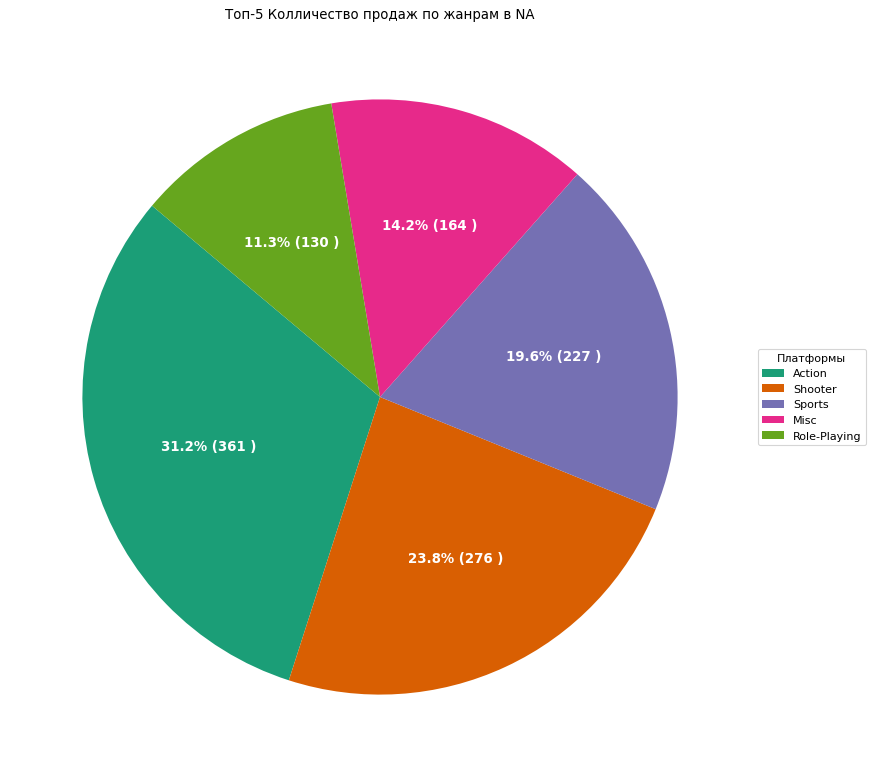

In [160]:
plot_sales_reign(data_na_top_genre, 'na_sales', 'genre', "жанрам в NA")

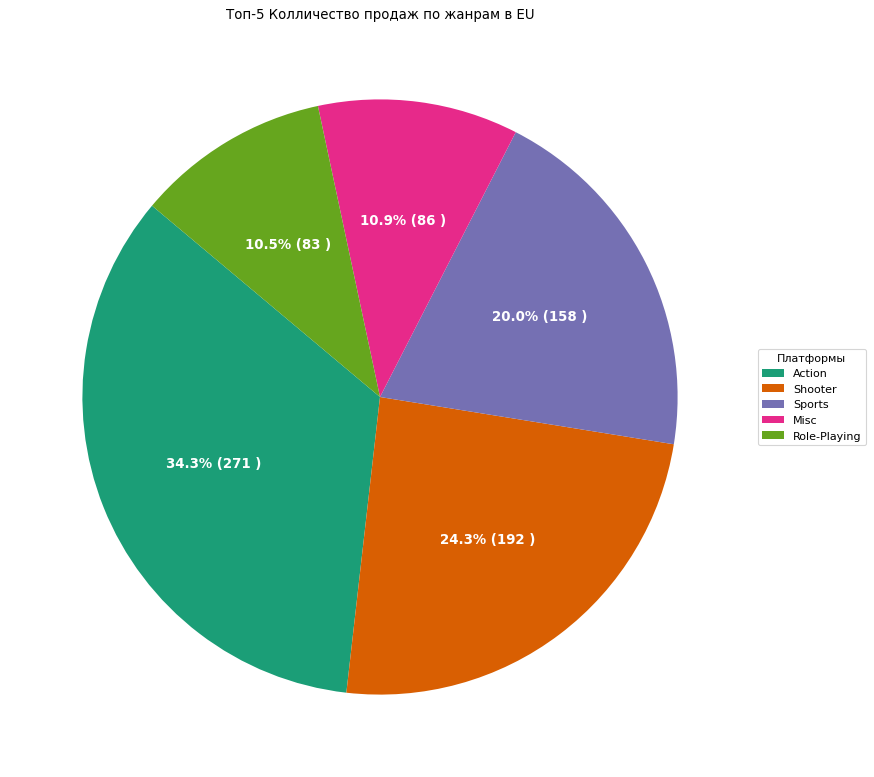

In [162]:
plot_sales_reign(data_eu_top_genre, 'eu_sales', 'genre', "жанрам в EU")

1. Так же прослеживается, что предпочтения игроков NA и EU регионов полностью совпадает между собой, вплоть до процентов.
2. В японии в топе жанров стоит РПГ, возможно это связано с тем, что япония является родоночальником обособленного жанра, названного в четь данного региона как JRPG

In [138]:
data_rating = data.groupby(['rating']).sum()[['na_sales','eu_sales','jp_sales']]
data_rating

,na_sales,eu_sales,jp_sales
rating,,,
E,403.16,261.50,61.49
E10+,202.94,121.63,20.82
EC,1.32,0.00,0.00
M,440.86,326.50,35.63
RP,0.00,0.03,0.00
T,227.11,153.28,50.59
X,190.57,166.21,198.50


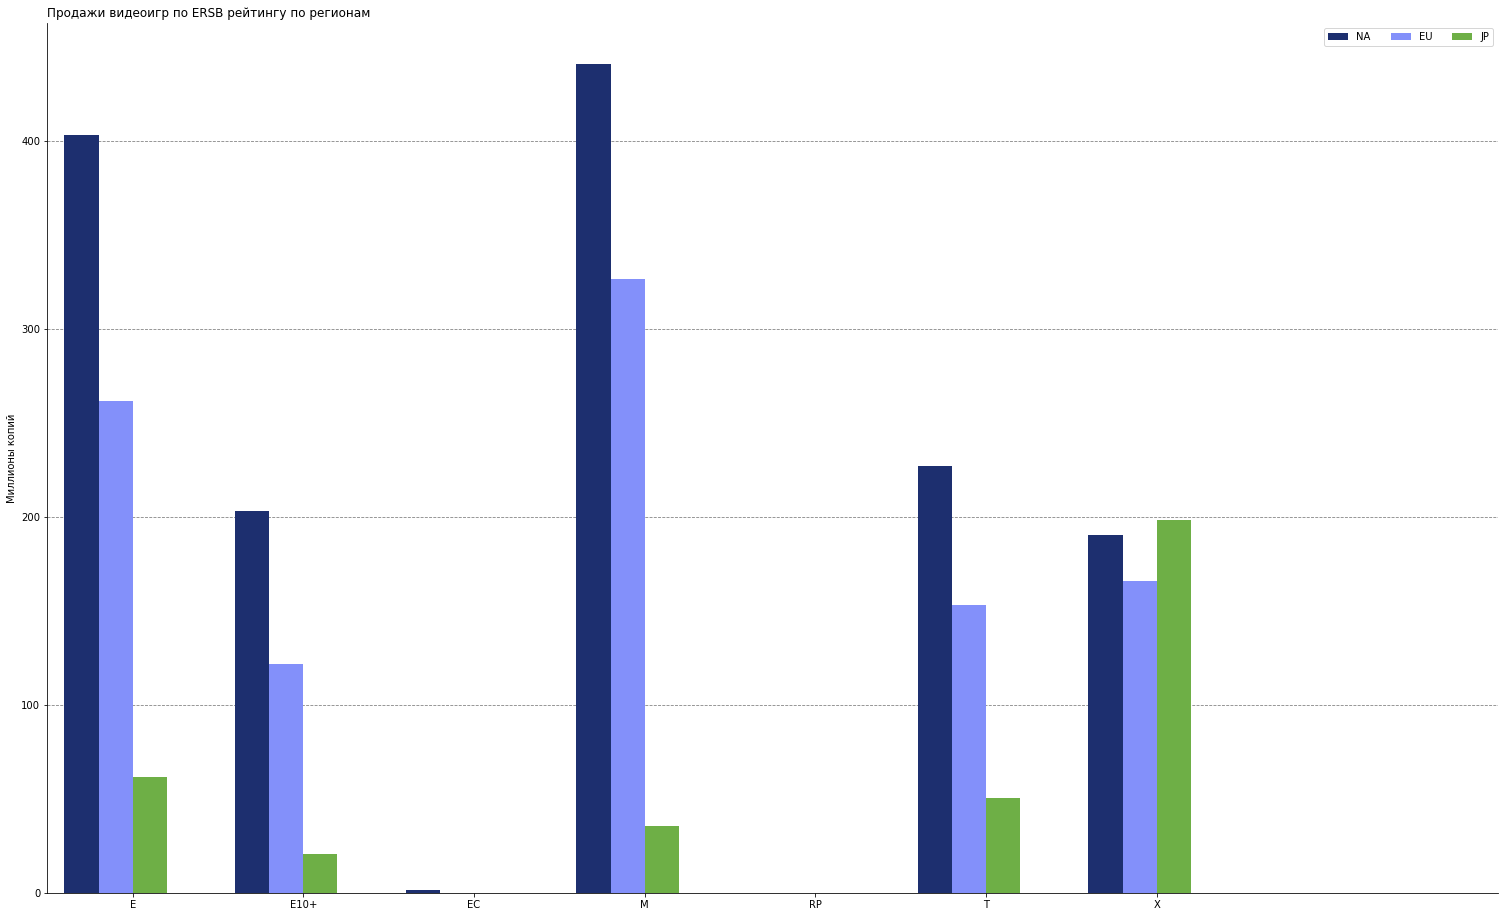

In [139]:
fig, ax = plt.subplots(1, figsize=(26, 16))

x = np.arange(0, len(data_rating.index))

plt.bar(x - 0.3, data_rating['na_sales'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, data_rating['eu_sales'], width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, data_rating['jp_sales'], width = 0.2, color = '#6EAF46')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel('Миллионы копий')
plt.xticks(x, data_rating.index)
plt.xlim(-0.5, 8)

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=1)

plt.title('Продажи видеоигр по ERSB рейтингу по регионам', loc ='left')
plt.legend(['NA', 'EU', 'JP'], loc='upper right', ncol = 4)
plt.show()

1. В Регионах EU и NA видны, что существуют существенных продажи игр ориентированных на в том числе детскую аудитория, тоесть охватывает наибольшую возможную целевую аудиторию
2. Несмотря на то, что существует множество игр старающихся охватить наибольшую ЦА, в NA и EU так же очень популярны игры для старшей аудитории.
3. В JP очень популярны игры не прошедшие оценку ERSB, возможно это связано с системой оценивания игр своего региона или с законодательными особенностями

«**E**» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году.

«**E10**+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

«**EC**» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Игры, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «E».

«**M**» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

«**RP**» ( «Rating Pending»») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

«**T**» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. Примером может являться Rise of the Argonauts.

X(наш маркер)

# Шаг 5. Проверьте гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
1. Как вы сформулировали нулевую и альтернативную гипотезы;
1. Какой критерий применили для проверки гипотез и почему.

In [140]:
from scipy import stats as st

Т.к мы хотим сравнить средние оценки пользавателей двух платформ, то имеем следующее - нам необходимо выяснять равны ли средние оценки игроков по платформам. 
Исходя из этого формируем нулевую гипотезу,что оценки игроков на платформах Xone и PC равны между собой, при потверждении которой можно будет говорить о некоторой вероятности, что такое или большее различие можно получить случайно. В ином случае, мы отвергаем нулевую гипотезу и можеи говорить о не равенстве двух средних оценок игроков на платформах Xone и PC.

**Проверим дисперсии**

In [141]:
xone_mean = data.loc[data['platform'] == 'XOne', 'user_score']
pc_mean = data.loc[data['platform'] == 'PC', 'user_score']
xone_var = np.var(xone_mean, ddof=1)
pc_var = np.var(pc_mean, ddof=1)
xone_var, pc_var

(1.9069968429360702, 2.410220449921299)

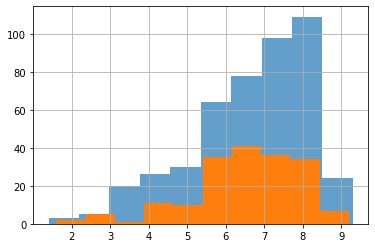

In [142]:
pc_mean.hist(alpha=0.7)
xone_mean.hist()
plt.show()

1. Распределения не нормальные:
        1.1 Юзерскор по XOne сильно сдвинут вправо
        1.2 Юзерскор по PC сдвинут правее
2. Если данные не распределены нормально, нужен критерий Манна-Уитни, также известный как Критерий Уилкоксона.

In [143]:
xone_mean = data.loc[data['platform'] == 'XOne', 'user_score']
pc_mean = data.loc[data['platform'] == 'PC', 'user_score']
 
alpha = .05 # критический уровень статистической значимости

u, result = st.mannwhitneyu(
    xone_mean,
    pc_mean)

print('p-значение:', result)

if result < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4253383898223515
Не получилось отвергнуть нулевую гипотезу


In [144]:
alpha = .05 # критический уровень статистической значимости

results =  st.ttest_ind(
    xone_mean,
    pc_mean,
    equal_var=False,
    nan_policy = 'omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2985617873396797
Не получилось отвергнуть нулевую гипотезу


В данном случае можно говорить о том, с вероятностью P средние оценки игроков на платформах XOne и PC равны.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Т.к мы хотим сравнить средние оценки пользавателей двух жанров, то имеем следующее - нам необходимо определить различны ли средние двух совокупностей по жанрам. 
Исходя из этого формируем нулевую гипотезу, что оценки игроков по жанрам acrion и sports равны между собой, при потверждении которой можно будет говорить о некоторой вероятности, что такое или большее различие можно получить случайно. В ином случае, мы отвергаем нулевую гипотезу и можеи говорить о не равенстве двух средних оценок игроков по жанрам acrion и sports.

**Проверим дисперсии**

In [145]:
action_mean = data.loc[data['genre'] == 'Action', 'user_score']
sport_mean = data.loc[data['genre'] == 'Sports', 'user_score']
action_var = np.var(action_mean, ddof=1)
sport_var = np.var(sport_mean, ddof=1)
action_var, sport_var

(1.8452258215640527, 2.883255576441105)

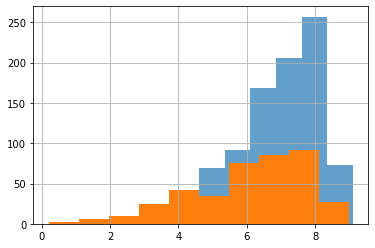

In [146]:
action_mean.hist(alpha=0.7)
sport_mean.hist()
plt.show()

1. Распределения не нормальные и смещены в правую сторону
2. Если данные не распределены нормально, нужен критерий Манна-Уитни, также известный как Критерий Уилкоксона.

In [147]:
action_mean = data.loc[data['genre'] == 'Action', 'user_score']
sport_mean = data.loc[data['genre'] == 'Sports', 'user_score']
 
u, result = st.mannwhitneyu(
    action_mean,
    sport_mean)

print('p-значение:', result)

if result < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.8792351699708175e-17
Отвергаем нулевую гипотезу


In [148]:


alpha = .05# критический уровень статистической значимости

results =  st.ttest_ind(
    action_mean,
    sport_mean,
    equal_var=False,
    nan_policy = 'omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.493323839141888e-13
Отвергаем нулевую гипотезу


В данном случае можно говорить о том что оценки игроков по жанрам Action и Sports не равны между собой

# Вывод

1. В данный момент виден тренд на спад общих продаж по всем платформам, возможно это связано с мобильным рынком видеоигр.
2. Существуют две наиболее распространеные платформы, которые представлены во всех регионах - PS3\PS4 и X360\XOne, несмотря на высокие общие продажи 3DS\Wii - они более распространены на рынке JP региона
3. Рынок PC несмотря на свою долговечность так же теряет свою долю как и остальные платформы, возможно необходим более детальный анализ данной платформы
4. В плане жанровой принадлежности стоит делать упор на игры жанров action\shooter\rpg и sports - они имеют наибольшую долю продаж среди жанров
5. Для предсказания продаж стоит ориентироваться на оценку критиков, т.к. данные параметр имеет среднюю корреляцию и это может помочь в прогнозах
6. Рейтинг E\E10+ и M\T предпочтительнее для NA и EU регионов, JP регион имеет более сложные предпочтения по рейтингу игр

- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: суммарные продажи во всех регионах 
- [x]  выяснено, сколько игр выпускалось в разные годы
- [x]  выбраны платформы с наибольшими суммарными продажами и построены распределение по годам.
- [x]  взяты данные за соответствующий актуальный период
- [x]  построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам
- [x]  выяснено, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. построена диаграмма рассеяния и посчитана корреляцию между отзывами и продажами
- [x]  выяснено общее распределение игр по жанрам.
- [x]  оперделен портрет для пользователя каждого региона (NA, EU, JP)
- [x]  проверены гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые "
- [x]  проверены гипотеза: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. "
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод